# 0.0 -  Instalação  e importação de Bibliotecas e Ferramentas de Análises

In [ ]:
!pip install missingpy
!pip install seaborn==0.9.0

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import plotly.express as px

# Expressão Regulares
import re

# Estatística
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ranksums
import statsmodels.formula.api as smf


# 1.0 - Carregando e lendo o arquivo - Info e Types

In [3]:
# Coleta de dados - Base de dados da empresa
df = pd.read_excel('base.xlsx')

# Visualizando o dataset
df.head()

,Data da fatura,Código,SKU,Valor da nota,Identificação cliente,Perfil produtor,Tamanho da propriedade (ha)
0,2021-01-01,Sementes,Sementes,2894.400000,447,HF,12.0
1,2021-01-01,Defensivo,Defensivo,30861.904245,462,HF,8.4
2,2021-01-01,Sementes,Sementes,4783.800000,529,HF,18.0
3,2021-01-01,Sementes,Sementes,8743.500000,801,HF,13.2
4,2021-01-01,Defensivo,Defensivo,25207.207278,801,HF,13.2


In [4]:
# Fazendo a exclusão da coluna SKU e arredondando os valores, respectivamente.

del df['SKU']
df['Valor da nota'] = df['Valor da nota'].round(2)
df['Tamanho da propriedade (ha)'] = df['Tamanho da propriedade (ha)'].round(2)

# Alterando o nome das colunas para facilitar o código
df = df.rename(columns={'Código': 'insumos', 'Perfil produtor' : 'produtor',
                             'Tamanho da propriedade (ha)': 'propriedade', 'Identificação cliente' : 'id_cliente',
                        'Valor da nota':'valor_venda', 'Data da fatura':'data'})

# Inserindo a coluna mês
df['mês'] = df['data'].dt.month_name()


In [5]:
# Verificando os meses de acordo com a data
df['mês'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [6]:
# Criando um dicionário e traduzindo os meses do ano.
meses = {'January':'Janeiro', 'February':'Fevereiro', 'March':'Março','April':'Abril',
        'May':'Maio', 'June':'Junho', 'July':'Julho', 'August':'Agosto',
        'September':'Setembro','October':'Outubro','November':'Novembro',
        'December':'Dezembro'}

# Traduzindo com .map
df['mês'] = df['mês'].map(meses)

In [7]:
# Visualizando o dataset formatado
df.head()

,data,insumos,valor_venda,id_cliente,produtor,propriedade,mês
0,2021-01-01,Sementes,2894.40,447,HF,12.0,Janeiro
1,2021-01-01,Defensivo,30861.90,462,HF,8.4,Janeiro
2,2021-01-01,Sementes,4783.80,529,HF,18.0,Janeiro
3,2021-01-01,Sementes,8743.50,801,HF,13.2,Janeiro
4,2021-01-01,Defensivo,25207.21,801,HF,13.2,Janeiro


In [8]:
# 1. Retornando o array de valores únicos
print('Tipos de Insumos {}'.format (df.insumos.unique()))

print('Tipos de produtor {}'.format  (df.produtor.unique()))

Tipos de Insumos ['Sementes' 'Defensivo' 'Fertilizantes']
Tipos de produtor ['HF' 'Café' 'Cana' 'Algodão' 'Grãos - MAPITOBA' 'Grãos - Cerrado'
 'Grãos - Sul']


### 1.1 - Check NA

In [9]:
# 2. Retornar a existência de dados NA
df.isnull().sum()

data           0
insumos        0
valor_venda    0
id_cliente     0
produtor       0
propriedade    0
mês            0
dtype: int64

###1.2 - Data Info e Types

In [10]:
# 3. Retornando informações sobre o dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23247 entries, 0 to 23246
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         23247 non-null  datetime64[ns]
 1   insumos      23247 non-null  object        
 2   valor_venda  23247 non-null  float64       
 3   id_cliente   23247 non-null  int64         
 4   produtor     23247 non-null  object        
 5   propriedade  23247 non-null  float64       
 6   mês          23247 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.2+ MB
None


In [11]:
# Criando um dicionário com o tipo de alteração
dt_types = {'id_cliente':'object', 'mês':'object'}
df = df.astype(dt_types)
df.dtypes

data           datetime64[ns]
insumos                object
valor_venda           float64
id_cliente             object
produtor               object
propriedade           float64
mês                    object
dtype: object

In [12]:
df.head(1)

,data,insumos,valor_venda,id_cliente,produtor,propriedade,mês
0,2021-01-01,Sementes,2894.4,447,HF,12.0,Janeiro


In [13]:
# Reordenando as colunas
ordem = ['mês', 'data', 'id_cliente', 'propriedade', 'produtor', 'insumos', 'valor_venda']

df2 = df.reindex(columns = ordem)
df2.head(1)

,mês,data,id_cliente,propriedade,produtor,insumos,valor_venda
0,Janeiro,2021-01-01,447,12.0,HF,Sementes,2894.4


In [14]:
# Salvando o dataset
df2.to_csv('dadosv2.csv')

# 2.0 - Exploração de dados - Estatística Descritiva

### 2.1 - Estatística Descritiva

In [15]:
# dataset para acompanhamento
df2.head(1)

,mês,data,id_cliente,propriedade,produtor,insumos,valor_venda
0,Janeiro,2021-01-01,447,12.0,HF,Sementes,2894.4


### 2.1.1 - Indicadores estatísticos descritivos - Valores numéricos

In [16]:
# Retornando indicadores estatísticos descritivos para os valores numéricos
df2.describe().round(2)

,propriedade,valor_venda
count,23247.00,23247.00
mean,2059.25,224145.76
std,4402.41,689521.84
min,7.20,0.00
25%,239.04,12211.66
50%,513.60,44004.16
75%,1249.92,130497.70
max,25899.60,17213726.40


### 2.1.2 - Indicadores estatísticos descritivos - Valores categóricos

In [17]:
# Retornando indicadores estatísticos descritivos para valores categóricos
df2.describe(include = ['object', 'category'])

,mês,id_cliente,produtor,insumos
count,23247,23247,23247,23247
unique,12,4998,7,3
top,Julho,485,Grãos - Sul,Defensivo
freq,4024,13,9306,12787


### 2.1.3 - Indicadores estatísticos descritivos - Valores numéricos ( > 0.0 )

In [18]:
# Mínimo do valor das notas: 0, identificando o cliente que não comprou com a empresa;
# Fazer a exclusão para melhor os valores visto na primeira análise descritiva.

filtro  = df2['valor_venda'] > 0.0
df2 = df2[filtro]

df2.describe().round(2)

# Retornou o novo df2 sem o valor zero no valor_venda.

,propriedade,valor_venda
count,23246.00,23246.00
mean,2059.34,224155.40
std,4402.48,689535.10
min,7.20,29.67
25%,239.04,12212.64
50%,513.60,44004.83
75%,1249.92,130502.10
max,25899.60,17213726.40


In [19]:
# Análise da Carteira de Cliente:
id485 = df2.query('id_cliente == 485')
id485

#-------------Estatística descritiva - Cliente 485-------------#

# id485.describe().round(2)
# Retorna um descrição dos valores totais de compra, média de compra, valor mínimo e máximo comprados pelo cliente.

# id485.describe(include = ['object', 'category'])
# Retorna uma descrição de valores categóricos em relação ao cliente, mês que mais comprou, insumo que mais consumiu.

#--------------------------------------------------------------#


,mês,data,id_cliente,propriedade,produtor,insumos,valor_venda
5259,Maio,2021-05-06,485,16924.8,Grãos - MAPITOBA,Sementes,1416901.50
6235,Maio,2021-05-18,485,16924.8,Grãos - MAPITOBA,Fertilizantes,3395340.00
6612,Maio,2021-05-22,485,16924.8,Grãos - MAPITOBA,Defensivo,3782674.18
7445,Maio,2021-05-31,485,16924.8,Grãos - MAPITOBA,Sementes,144462.37
8288,Junho,2021-06-08,485,16924.8,Grãos - MAPITOBA,Fertilizantes,130590.00
8978,Junho,2021-06-14,485,16924.8,Grãos - MAPITOBA,Sementes,91413.00
15760,Agosto,2021-08-07,485,16924.8,Grãos - MAPITOBA,Defensivo,210148.89
16402,Agosto,2021-08-12,485,16924.8,Grãos - MAPITOBA,Defensivo,420297.45
17009,Agosto,2021-08-17,485,16924.8,Grãos - MAPITOBA,Fertilizantes,391770.00
17855,Agosto,2021-08-24,485,16924.8,Grãos - MAPITOBA,Defensivo,52537.49


###2.1.4 - Cliente Ranking

In [20]:
ranking_clientes = pd.DataFrame(df2.groupby('id_cliente')['id_cliente'].count())
ranking_clientes

,id_cliente
id_cliente,
1,6
2,2
3,5
4,6
5,5
...,...
4996,2
4997,4
4998,3


### 2.1.5 - Faturamento Bruto - 2021

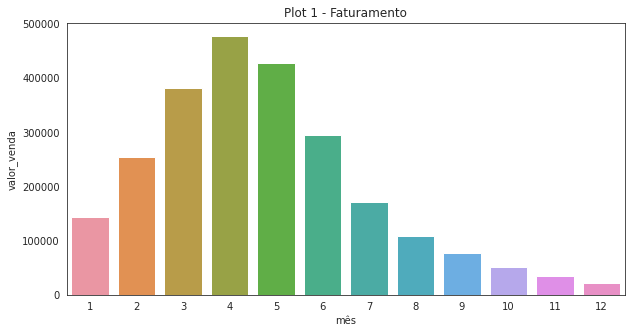

In [21]:
# Verificando a relação entre o mês de Julho com a frequência na qual se repetiu
# Será que foi o mês que mais faturou?
faturamento_agrupado1 = pd.DataFrame(df2.groupby('mês')['valor_venda'].mean().round(2))

# faturamento_agrupado1.head(13) - # Retorna o valor agrupado de cada mês, iniciando por Abril.

# Organizando os valores através de um dicionárinoio 
faturamento_agrupado2 = pd.DataFrame({'mês': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                     'valor_venda':[143302.30, 255288.90, 382821.85, 478056.04, 428887.46, 294540.64,
                                                     171029.99, 108174.70, 77939.20, 50616.16, 35602.41, 21972.23 ]},                                   
                                   columns = ['mês','valor_venda'])

# Plot do agrupamento organizado, iniciando por Janeiro
plt.figure(figsize=(10,5))
sns.barplot(x = 'mês', y = 'valor_venda', data = faturamento_agrupado2)
plt.title('Plot 1 - Faturamento');


# 3.0 - Visualizações


### 3.1 - BoxPlot

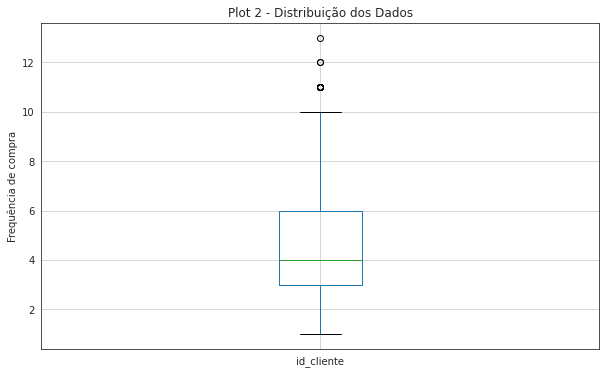

In [22]:
plt.figure(figsize=(10,6))

ranking_clientes.boxplot(['id_cliente'])

plt.title('Plot 2 - Distribuição dos Dados')

plt.ylabel('Frequência de compra');


### 3.1.1 - Calculando os Quartis

In [23]:
id_cliente = ranking_clientes['id_cliente']

In [24]:
Q1 = id_cliente.quantile(.25)
Q1

3.0

In [25]:
Q3 = id_cliente.quantile(.75)
Q3

6.0

In [26]:
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

### 3.1.2 - Remoção de Outliers

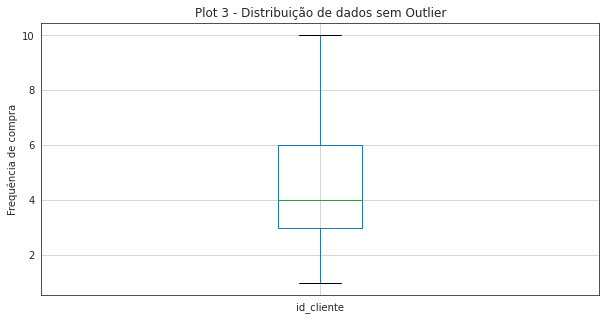

In [27]:
#Seleção dos dados dentro dos limites
selecao = (id_cliente >= limite_inferior) & (id_cliente <= limite_superior)
boxplot2 = pd.DataFrame(id_cliente[selecao])

plt.figure(figsize=(10,5))
boxplot2.boxplot(['id_cliente']).set_title('Plot 3 - Distribuição de dados sem Outlier')

plt.ylabel('Frequência de compra')
plt.show()


# 4.0 - Exploração de Dados - Outliers

### 4.1 - Ranking Clientes - (> 10 Frequências de compra) 

In [28]:
# Criação de um arquivo apenas com os clientes considerados Outliers

df3 = df2.groupby('id_cliente').filter(lambda x: len(x) >= 10)
df3.to_csv('dadosv3.csv')
df3

,mês,data,id_cliente,propriedade,produtor,insumos,valor_venda
54,Janeiro,2021-01-05,515,14.40,HF,Fertilizantes,1980.50
138,Janeiro,2021-01-10,3831,12.00,HF,Defensivo,5635.48
370,Janeiro,2021-01-21,4487,298.08,Café,Fertilizantes,245753.60
526,Janeiro,2021-01-26,3831,12.00,HF,Defensivo,18784.92
544,Janeiro,2021-01-27,2256,13.20,HF,Fertilizantes,1286.04
...,...,...,...,...,...,...,...
23215,Dezembro,2021-12-28,876,2731.20,Grãos - MAPITOBA,Defensivo,87560.83
23222,Dezembro,2021-12-29,1394,685.15,Grãos - MAPITOBA,Defensivo,1558.54
23236,Dezembro,2021-12-31,408,573.60,Grãos - Sul,Sementes,163954.00
23243,Dezembro,2021-12-31,3439,322.56,Grãos - Sul,Defensivo,5203.01


### 4.2 - Visualização - Correlação

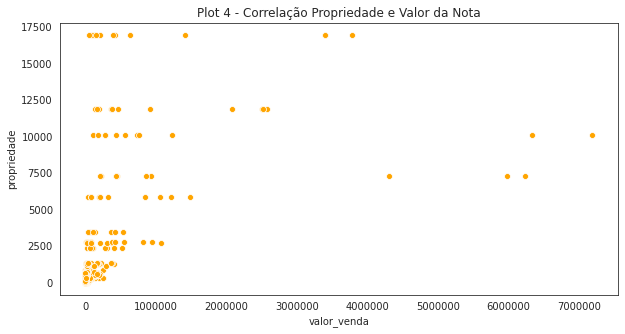

In [29]:
# Análise da relação valor da venda e propriedade
plt.figure(figsize=(10,5))

sns.scatterplot(x= 'valor_venda', y= 'propriedade', data=df3, color = 'orange')
plt.ticklabel_format(style = 'plain')
plt.title('Plot 4 - Correlação Propriedade e Valor da Nota');

### 4.2.1 - Visualização - Correlação Linear

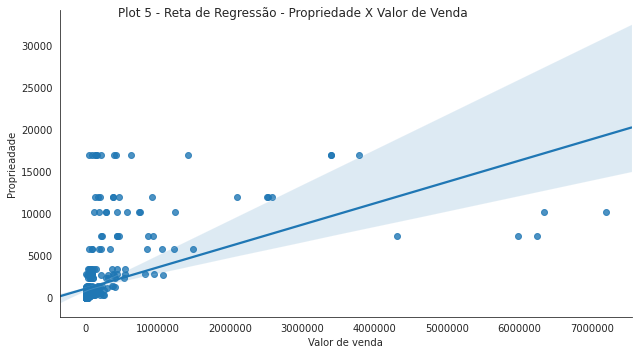

In [30]:
# Correlação Linear entre Tamanho da propriedade x Valor de venda

ax = sns.lmplot(x='valor_venda', y='propriedade', data=df3)
ax.fig.set_size_inches(10, 5)
ax.fig.suptitle('Plot 5 - Reta de Regressão - Propriedade X Valor de Venda')
ax.set_xlabels("Valor de venda")
ax.set_ylabels("Proprieadade")
plt.ticklabel_format(style = 'plain')
ax;

### 4.2.1.1 - Coeficiente de Correlação

In [31]:
# Valor Coeficiente de Correlação
df3.corr()

,propriedade,valor_venda
propriedade,1.000000,0.505217
valor_venda,0.505217,1.000000


### 4.3 - Estatítica Descritiva e Valores de, ρ (rô), correlação 

In [32]:
# Análise descritiva dos três primeiros meses

#  Março
analise_março = df[df['mês'] == 'Março']
analise_março

# # Describe de valor númericos
analise_março.describe().round(2)

# Describe de categorias
analise_março.describe(include = ['object', 'category'])

# Correlação Linear

analise_março.corr()

,valor_venda,propriedade
valor_venda,1.000000,0.616585
propriedade,0.616585,1.000000


In [33]:
# Abril
analise_abril = df[df['mês'] == 'Abril'].set_index('data')
analise_abril

#  Describe de valor númericos
analise_abril.describe().round(2)

#  Describe de categorias
analise_abril.describe(include = ['object', 'category'])

#  Correlação Linear
analise_abril.corr()

,valor_venda,propriedade
valor_venda,1.000000,0.546486
propriedade,0.546486,1.000000


In [34]:
# Maio
analise_maio = df[df['mês'] == 'Maio'].set_index('data')
analise_maio

#  Describe de valor númericos
analise_maio.describe().round(2)

# Describe de categorias
analise_maio.describe(include = ['object', 'category'])

# Correlação Linear
analise_maio.corr()

,valor_venda,propriedade
valor_venda,1.000000,0.529926
propriedade,0.529926,1.000000


### 4.3.1 - Insigths Conclusivo

Principais Idéias :

* Análise da Correlação entre Valor da venda e Propriedade;

É possível prever que não existe uma correlação entre clientes que tem maior propriedade com aqueles que gastam mais, como mostra o plot 3.
A acumulo dos pontos mostra que parte dos proprietários considerados pequenos são os que compram mais com a empresa.

Plot 4, retrata  a reta de regressão apresenta um comportamento não linear, ou seja, pontos do diagrama de dispersão ,não estão distribuídos ao longo da reta.

Em termos de validação o valor de retornor do coeficiente é 0.5052, em um patamar categórico que indica um correlação moderada.

* Valores para interpretação:
    * 0.9 para mais ou para menos indica uma correlação muito forte.
    * 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    * 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    * 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    * 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

* Análise descritiva dos três meses que tiveram maior faturamento.

Os meses que apresentaram maior destaque durante o ano, foram análisados.

A estatística descritiva básica nos traz bastante insights e que de certa forma ajudam a guinar as estratégias de vendas e aquisição de novos clientes.

Em resumo:

* Março: 
* Insumo líder em vendas foi o defensivo, que representa 54% do total do mês;
* Perfil do protudor com maior destaque foram os produtores de café;
* Para correlação, trata-se de um nível moderada, 0,61.



* Abril:
* Insumo líder em vendas também foi o defensivo, com uma representatividade de 55%;
* Perfil do protudor foi o MAPITOBA;
* Para correlação, como Março, também é considerada nível moderado, mais baixo, porém moderado, 0,54.



* Maio:
* Denfensivo com destaque do mês, com 49% das vendas;
* Produtores da Região MAPITOBA como destaque;
* Nível de correlação também moderado. 0,529.

# 5.0 - Conclusão

Relacionar-se bem om o cliente é fundamental para qualquer organização. Sem eles, afinal, não há negócio. 

É o bom relacionamento com os clientes que lança as bases para a fidelização do consumidor. Os dados retratam uma carteira extensa de clientes, onde os mais fidelizados, são outliers, que em tese eram pra ser considerados pontos ruins, mas no exemplo acima, os ditos "pontos fora da curva" são o que trazem maior rentabilidade para o negócio. 

E por fim duas propostas de implementação de melhoria visando entender a necessidade do cliente, uma longo e outra a curto prazo.

* Longo prazo;

Como umas estratégia de entender, ativar e reter os clientes, poderia ter um estudo de implantação de um CRM (Customer Relationship Management) que visa utilizar as informações dos clientes para gerenciar suas contas, identificar oportunidades de vendas e outras atividades potencialmente lucrativas.

* Curto Prazo;

Estruturação de uma régua de relacionamento,  basicamente o conjunto de ações estruturadas, que vão desde os processos de marketing até as etapas de retenção do cliente.

Com essa ferramenta é possível estabelecer passos que vão nos levar ao que deve ser feito para conseguir atingir melhores resultados, alinhando completamente os times de inbound, outbound, Sucesso do Cliente e também Produto.